<a href="https://colab.research.google.com/github/TianaGabel/C-2025/blob/main/DataWranglingFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grant funding trends at CSU
**Author:** Tatiana Gabel

**Overview:** This project investigates new university grant funding at csu.

### **Background:**
Universities receive a variety of external funding to support research, programs, employee costs, development projects among other initiatives. This support comes in the form of grants, cooperative agreements, contracts, etc. Which are collectively known as sponsored programs/projects. In order to receive funding Primary investigators(PIs) submit proposals to outside organizations such as federal agencies, corporations, non-profits or foundations. CSU is considered an R1 institution, which means that //. Hence, the funding for sponsored projects is essential for csu to stay competitive.

For this project, I will be narrowing my scope to Grants awarded by federal agencies.
- I have opted to focus on grants instead of cooperative agreements as in cooperative agreements federal employees worked directly with the project, rather than monitoring performance at specific deadlines.
- I chose federal agencies as historically they were the largest sponsors of academic research. However, as of 2025 the current poltical climate poses the threat of funding cuts and freezes which could significantly impact CSU.

Additionally, to further narrow the scope of data used only grants above 1,000 dollars between the years of 2016-2024 were used.

I will refer to grants with a start date within the specified year as "New" grants, even if the grant is for additional funding of a previous grant.

### **Datasets:**
**Office of sponsored projects University grant data**


Link: https://vprweb.research.colostate.edu/Proposal-Award-History-Search/Award.aspx

Description:
Contains the fields
- Principal investigator
- PI title
- Account Number
- Amount Obligated
- Start Date
- End Date
- Grant Title
- Transaction Type (Language has been altered each year. 2024 descriptions are much more concise and non-descriptive)
- College/Department
- Sponsor Agency

**CSU Faculty Credentials**

Link: https://app.powerbi.com/view?r=eyJrIjoiNTNiOTg2YzktNzg3MS00YjY4LTk1MDAtZmZjM2EzMjhjNGFiIiwidCI6ImFmYjU4ODAyLWZmN2EtNGJiMS1hYjIxLTM2N2ZmMmVjZmM4YiIsImMiOjZ9

Description:
Information on basic faculty credentials, most PIs are also faculty which allows the above dataset to be merged on the name field.
Contains the fields
- Name
- Department/Division
- Rank/Seniority (ex: associate professor)
- Tenured Status
- Highest Degree earned
 - Major
 - Year
 - University

**CSU Faculty Citation Counts**

//TODO
Link:

Description:
The H-index provides a mesure of the number of research papers that have been citated more than 10 times, indicating their work has been meaningful to research.

### **Methodology:**
1. **Data Exploration:**
My initial exploration of the data was looking for a meaningful way to reduce the scope of the project. Based on the 2024 data nearly half of listed sponsored program transactions were for grants, it was not uncommon for multiple grants to be received for the same project(same account number), nor for a PI to have multiple projects that received funding. Around half of grants lasted less than 2 years, and around another 40% lasted between 2 to 6 years. There is a peak in funding in September and December, potentially correlating with the start of the college semester, or with company budgeting quarters
3. **Cleaning Data:**


# Import and Data Cleaning

In [126]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

warnings.filterwarnings("ignore")

grant_data = {}
for year in range(2016,2025):
  file_name = f"FederalGrantFunding{year}.xlsx"
  df = pd.read_excel(file_name, header=0)
  grant_data[year] = df

sponsored_programs_all_2024 = pd.read_excel("AllAwards2024.xlsx")

faculty_credentials = pd.read_excel("Faculty-Credentials.xlsx")

In [187]:
sponsored_programs_all_2024 = pd.read_excel("data.xlsx")
sponsored_programs_all_2024.head()

,Principal Investigator,Account Number,Obligated Amount,Transaction Date,Start Date,End Date,Title,Transaction Description,Award Type,Sponsor Type,College/Division,Email Address,Title.1,ENAME,Sponsor Name
0,"Barnes Keys,Elizabeth Adrianne",5361791.0,1000.0,2019-06-03 22:18:10,2017-09-01,2020-08-31,DOE Computational Science Graduate Fellowship ...,YEAR 3 RENEWAL,Grant,Domestic Non-Profit (other than Domestic Found...,"Engineering, Walter Scott, Jr. (SCOE)",Elizabeth.Barnes@colostate.edu,Professor,eabarnes,The Krell Institute
1,"Barnes Keys,Elizabeth Adrianne",5361791.0,1000.0,2020-05-13 10:12:05,2017-09-01,2021-08-31,DOE Computational Science Graduate Fellowship ...,Add funding per renewal.,Grant,Domestic Non-Profit (other than Domestic Found...,"Engineering, Walter Scott, Jr. (SCOE)",Elizabeth.Barnes@colostate.edu,Professor,eabarnes,The Krell Institute
2,"Barnes,Elizabeth Adrianne",5337362.0,1000.0,2021-06-11 08:49:29,2019-09-01,2022-08-31,COST OF ED: DOE CSGF Fellowship for Jamin Rader,Year 3 funds,Grant,Domestic Non-Profit (other than Domestic Found...,"Engineering, Walter Scott, Jr. (SCOE)",Elizabeth.Barnes@colostate.edu,Professor,eabarnes,The Krell Institute
3,"Berger,Joshua",5360177.0,1000.0,2022-06-29 10:53:46,2022-05-31,2022-06-30,Jamie Dyer : Travel Support to Attend the 2022...,5360177 initial funds,Grant,Domestic Non-Profit (other than Domestic Found...,Natural Sciences,Joshua.Berger@colostate.edu,Assistant Professor,joberger,"Universities Research Association, Inc."
4,"Bradley,Thomas Heenan",5300563.0,1000.0,2017-08-16 11:11:56,2014-04-09,2018-06-24,EcoCAR3,Add Budget for checks received 081617,Contract,Domestic Commercial,"Engineering, Walter Scott, Jr. (SCOE)",Thomas.Bradley@colostate.edu,Professor,thb,"Various ""For Profit"" Sponsors"


# RQ 1: What does sponsored project funding look like at CSU?
- Types of funding percentages
- Grant Cycle
- Funding amount by time of year
- Department funding (Trends in funding??)

In [142]:
# Pivot table of amount obligated by award type and sponsor type
# Credit to https://stackoverflow.com/questions/68668046/styling-pandas-pivot-table-with-multiple-columns for table styling
award_type_by_sponsor_type = pd.pivot_table(sponsored_programs_all_2024, values='Obligated Amount', columns='Award Type', index='Sponsor Type', aggfunc='sum', fill_value=0, margins=True,margins_name='Total_Awarded')
award_type_by_sponsor_type.style.format('${:,.0f}')

Award Type,Contract,Cooperative Agreement,GSA,Grant,IPA Agreement,OTA - Fed or FFT,Other,Total_Awarded
Sponsor Type,,,,,,,,
Colorado Higher Education - Private,"$115,000",$0,$0,"$3,600",$0,$0,$0,"$118,600"
Domestic Commercial,"$105,689,221","$5,496,449",$0,"$49,671,324",$0,$0,"$809,280","$161,666,274"
Domestic Foundations,"$17,639,177","$2,187,260",$0,"$98,620,857",$0,$0,"$123,024","$118,570,318"
Domestic Non-Profit (other than Domestic Foundations),"$54,596,070","$11,737,456","$30,000","$72,494,677",$0,$0,"$1,032,272","$139,890,475"
Federal,"$102,695,629","$1,552,158,718",$0,"$1,306,445,393","$18,961,647","$600,000","$30,578,391","$3,011,439,779"
Foreign Commercial,"$22,523,455",$0,$0,"$8,200,441",$0,$0,$0,"$30,723,896"
Foreign Foundations,"$47,107",$0,$0,"$6,634,807",$0,$0,"$141,724","$6,823,638"
Foreign Government,"$1,279,129",$0,$0,"$1,603,210",$0,$0,$0,"$2,882,339"
Foreign Higher Education,"$2,535,643","$4,101,938",$0,"$2,729,327",$0,$0,$0,"$9,366,909"


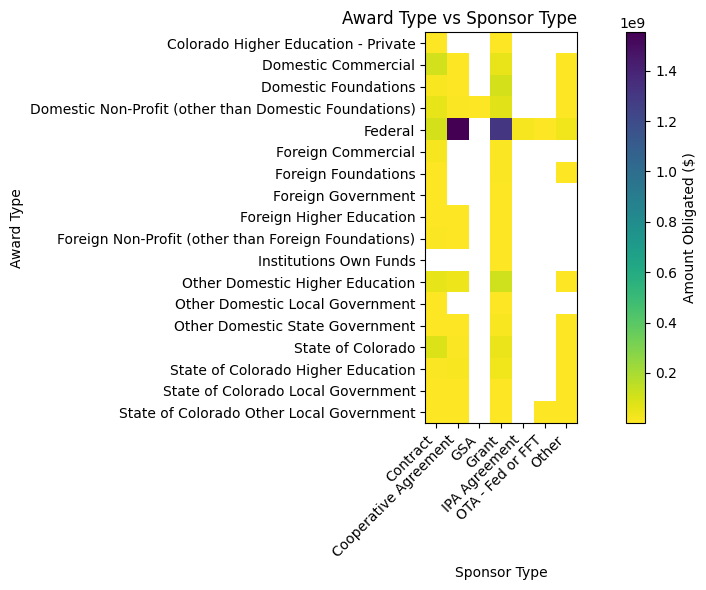

In [141]:
# Credit to "https://stackoverflow.com/questions/43943784/having-both-set-under-and-set-bad-working-in-matplotlib-contourf-plot" for how to update colormap

# New Table for graphing
award_type_by_sponsor_type = pd.pivot_table(sponsored_programs_all_2024, values='Obligated Amount', columns='Award Type', index='Sponsor Type', aggfunc='sum')
plt.figure(figsize=(10, 6))
colMap = cm.viridis_r
colMap.set_bad(color='white')
plt.imshow(award_type_by_sponsor_type, cmap=colMap)
plt.title("Award Type vs Sponsor Type",loc='right')
plt.xlabel("Sponsor Type")
plt.ylabel("Award Type")
plt.colorbar(label='Amount Obligated ($)')
plt.margins(0.1)

plt.xticks(ticks=range(len(award_type_by_sponsor_type.columns)), labels=award_type_by_sponsor_type.columns, rotation=45, ha='right')
plt.yticks(ticks=range(len(award_type_by_sponsor_type.index)), labels=award_type_by_sponsor_type.index)

plt.tight_layout()
plt.show()

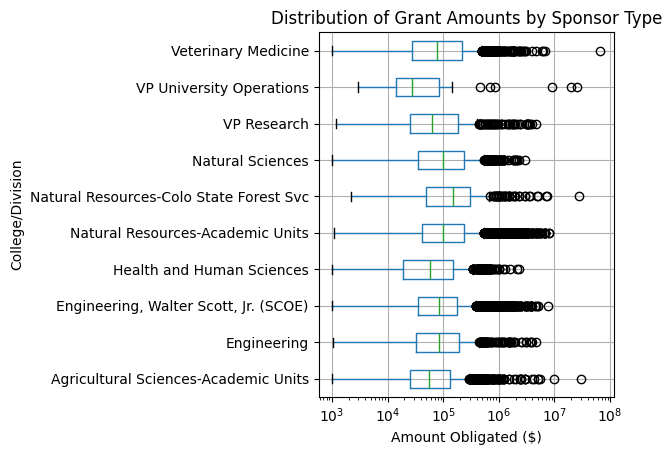

In [143]:
#TODO I would like to order the boxplots by either mean or most obligated
top_sponsors = sponsored_programs_all_2024.groupby('College/Division')['Obligated Amount'].sum().sort_values(ascending=False)
top_six = top_sponsors[:10]
#print(top_sponsors.index)
ax = sponsored_programs_all_2024[sponsored_programs_all_2024['College/Division'].isin(top_six.index)].boxplot(column='Obligated Amount', by='College/Division', vert=False)
ax.set_xscale('log')
plt.title("Distribution of Grant Amounts by Sponsor Type")
plt.suptitle("")
plt.xlabel("Amount Obligated ($)")
plt.tight_layout()
plt.show()

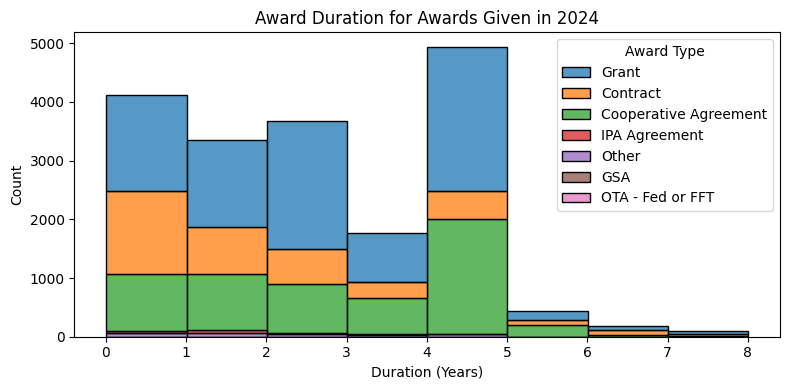

In [149]:
sponsored_programs_all_2024['Grant Duration (Years)'] = ((sponsored_programs_all_2024['End Date'] - sponsored_programs_all_2024['Start Date']).dt.days / 365).clip(lower=0)
sponsored_programs_all_2024_filtered = sponsored_programs_all_2024[sponsored_programs_all_2024['Grant Duration (Years)'] <= 8]

plt.figure(figsize=(8, 4))
sns.histplot(data=sponsored_programs_all_2024_filtered,
             x='Grant Duration (Years)',
             bins=8,  # 0 to 8 years
             hue='Award Type',
             multiple='stack')
plt.title("Award Duration for Awards Given in 2024")
plt.xlabel("Duration (Years)")
plt.tight_layout()
plt.show()


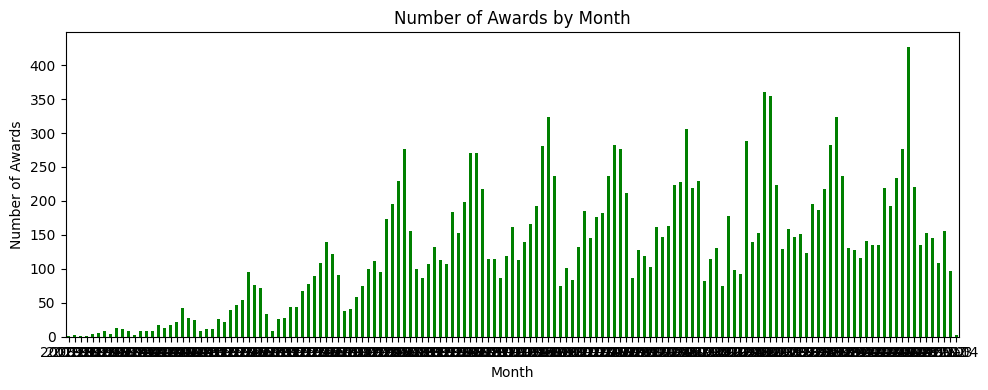

In [180]:
#TODO I think u should update to show start and end month
#sponsored_programs_all_2024['Month'] = sponsored_programs_all_2024['End Date'].dt.to_period('M').astype(str)
sponsored_programs_all_2024['Month'] = sponsored_programs_all_2024['Transaction Date'].dt.to_period('M').astype(str)
grants_monthly = sponsored_programs_all_2024.groupby('Month').size()


sponsored_programs_all_2024['End Month'] = sponsored_programs_all_2024['End Date'].dt.to_period('M').astype(str)
sponsored_programs_all_2024['Start Month'] = sponsored_programs_all_2024['Start Date'].dt.to_period('M').astype(str)
grants_m = sponsored_programs_all_2024.groupby('Month').size()

ax = grants_monthly.plot(kind='bar', figsize=(10, 4), color='green', title="Number of Awards by Month")
ax.plot(kind='bar', figsize=(10, 4), color='yellow', title="Number of Awards by Month")

plt.ylabel("Number of Awards")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [204]:
#TODO I wonder if it would be possible to do one of those point clouds from class
# could if there was an additional variable to consider
start_counts = sponsored_programs_all_2024['Start Month'].value_counts().sort_index()
end_counts = sponsored_programs_all_2024['End Month'].value_counts().sort_index()
t_counts = s['Month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(start_counts.index, start_counts.values, marker='o', label='Start Month')
plt.plot(end_counts.index, end_counts.values, marker='s', label='End Month')
plt.plot(t_counts.index, t_counts.values, marker='x', label='Transaction Month')

plt.xlabel('Month')
plt.ylabel('Number of Grants')
plt.title('Grants by Start and End Month')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


KeyError: 'Start Month'

# RQ 2: How has Federal Grant funding changed over 2016-2024?

Could be interesting to note the time where csu became an R1 institution
Vizualization 1
- Timeseries graph with number of awardees, projects and grants
Some tables with basic information
- Length of grants(Grant cycle)/other information from the general inquiry
- Stacked bar graph of most common federal agency funding.

-why the choice was made to do this
-code representation
-output graphs, what the results mean

In [189]:
federal_grants = pd.read_excel('data (1).xlsx')

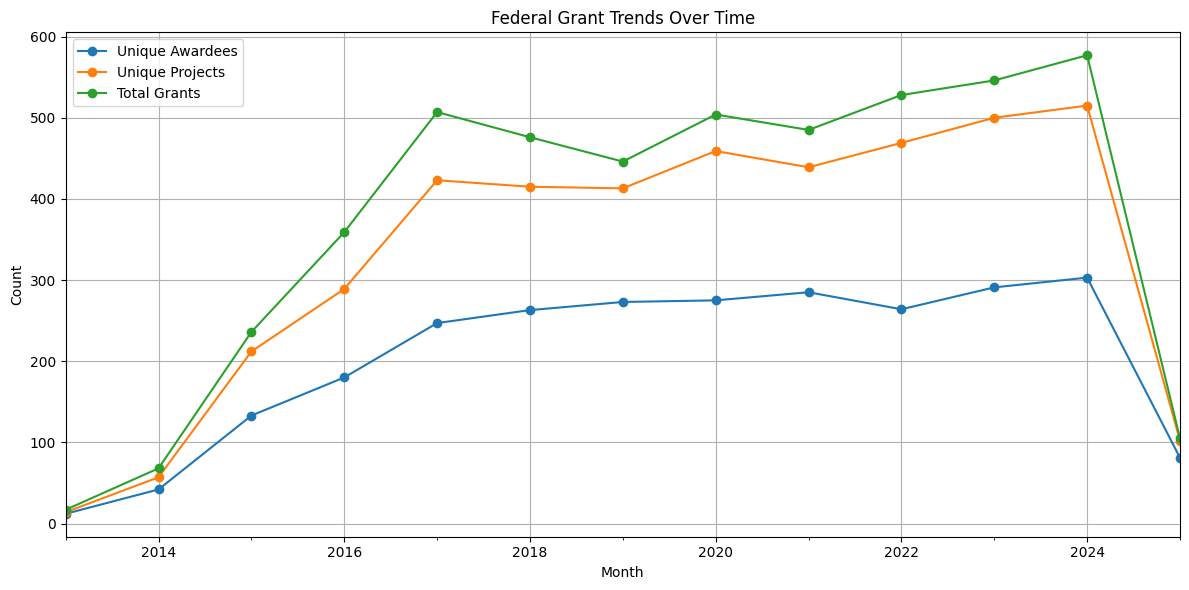

In [203]:
# Create a 'Month' column
federal_grants['Month'] = federal_grants['Transaction Date'].dt.to_period('Y').dt.to_timestamp()

# Group by Month
monthly_stats = federal_grants.groupby('Month').agg({ 'Principal Investigator': 'nunique','Account Number': 'nunique', 'Title': 'count'})
monthly_stats = monthly_stats.rename(columns={'Principal Investigator': 'Unique Awardees','Account Number': 'Unique Projects','Title': 'Total Grants'})

plt.figure(figsize=(12, 6))
monthly_stats.plot(ax=plt.gca(), marker='o')
plt.title('Federal Grant Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()


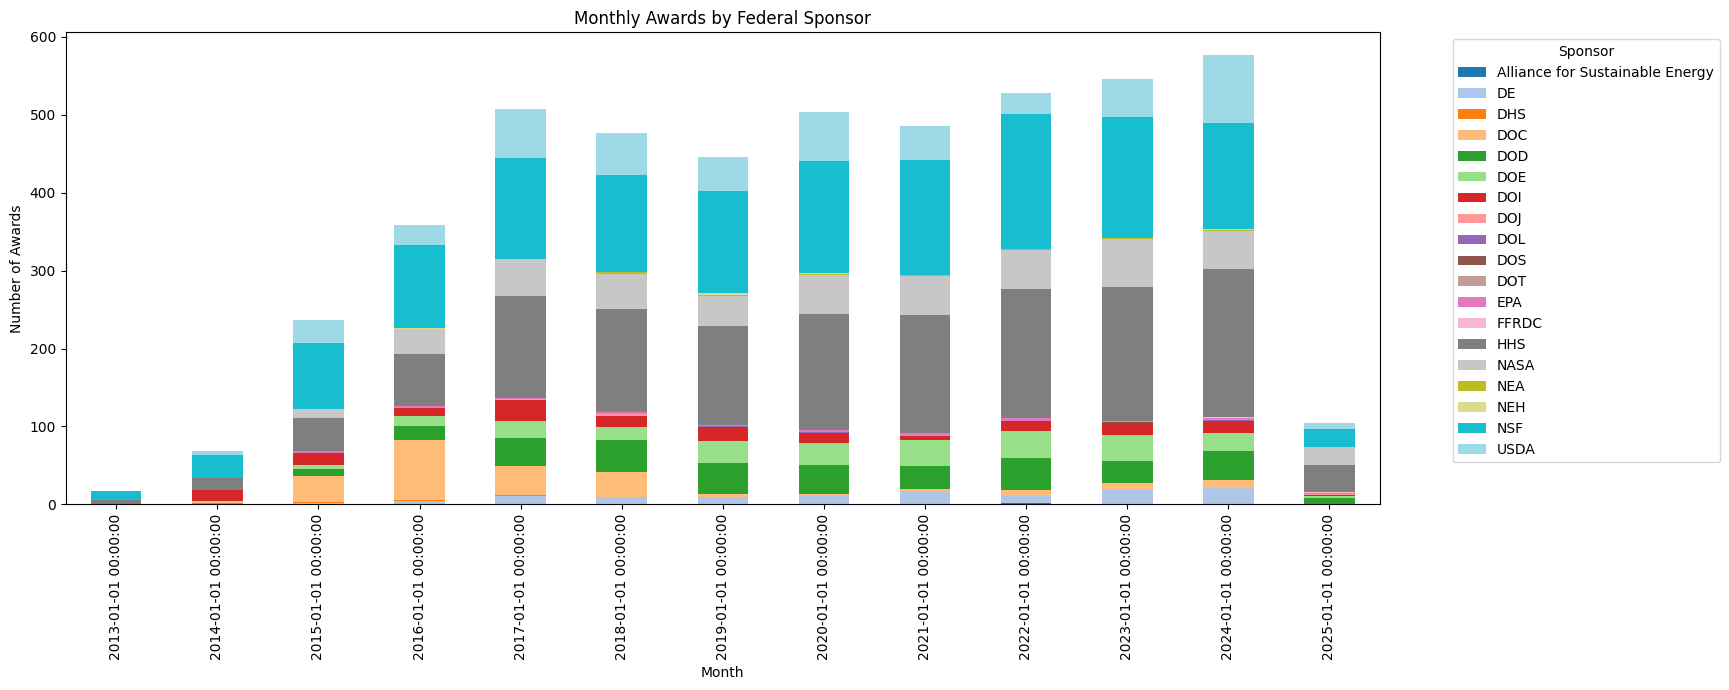

In [199]:
# Group by Month and Sponsor
#TODO update all the years and titles since this changed
federal_grants = federal_grants[federal_grants['Sponsor Name'].str.contains('-', na=False)]
federal_grants['Sponsor Group'] = federal_grants['Sponsor Name'].str.split('-').str[0].str.strip()
sponsor_monthly = federal_grants.groupby(['Month', 'Sponsor Group']).size().unstack(fill_value=0)

sponsor_monthly.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')
plt.title('Monthly Awards by Federal Sponsor')
plt.xlabel('Month')
plt.ylabel('Number of Awards')
plt.tight_layout()
plt.legend(title='Sponsor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


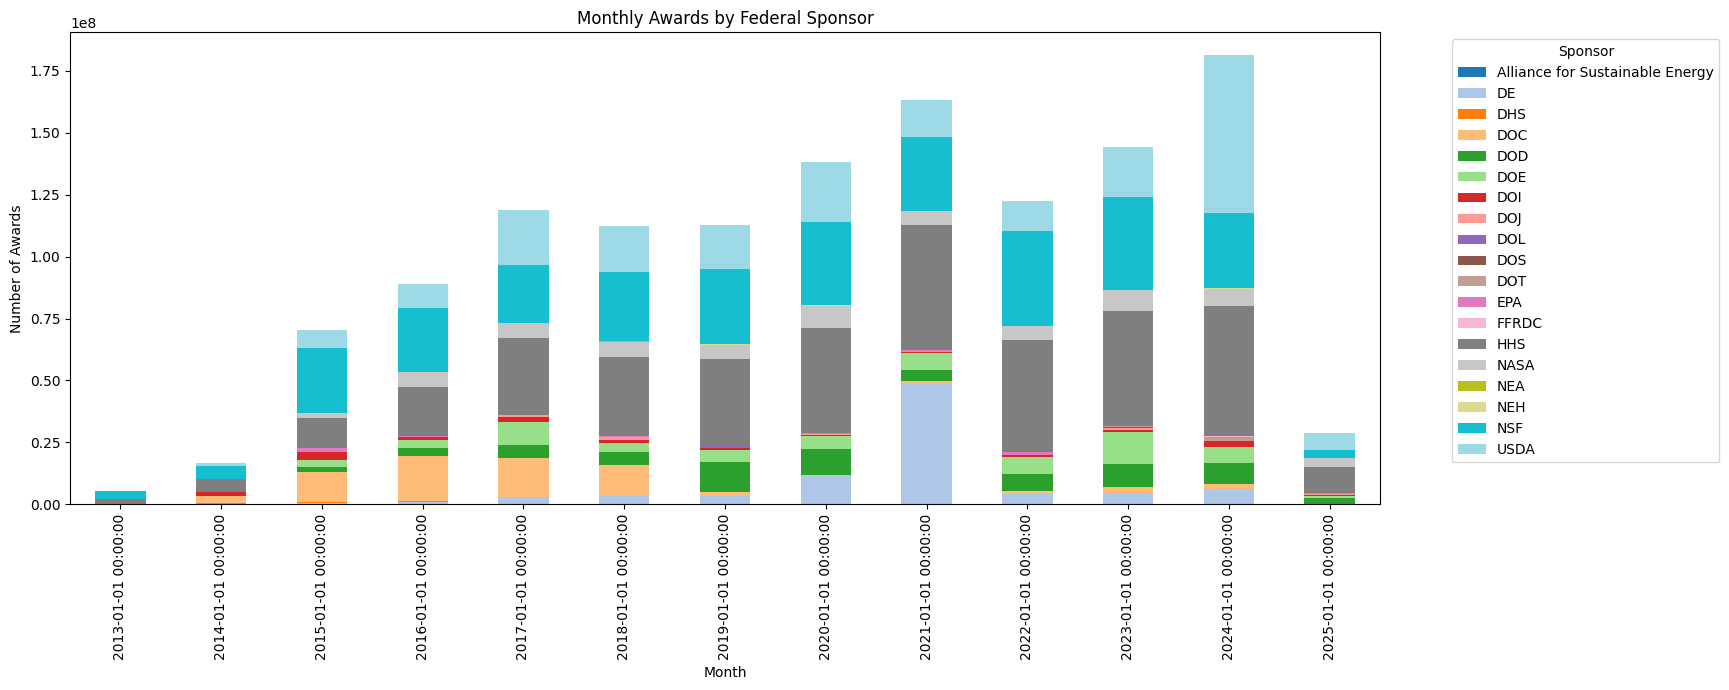

In [200]:
# Group by Month and Sponsor
#TODO update all the years and titles since this changed
federal_grants = federal_grants[federal_grants['Sponsor Name'].str.contains('-', na=False)]
federal_grants['Sponsor Group'] = federal_grants['Sponsor Name'].str.split('-').str[0].str.strip()
sponsor_monthly = federal_grants.groupby(['Month', 'Sponsor Group'])['Obligated Amount'].sum().unstack(fill_value=0)

sponsor_monthly.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')
plt.title('Monthly Awards by Federal Sponsor')
plt.xlabel('Month')
plt.ylabel('Number of Awards')
plt.tight_layout()
plt.legend(title='Sponsor', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


# RQ 3: What does the typical profile of "high-performing" PIs look like?

- Pivot table based on the awardee granted the most money?
- Most projects
- Potentially information on H-index

- "Average" PI


# Conclusions